## 1. Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
weather = pd.read_table('data/daily_weather.tsv')

In [5]:
weather['date'] = pd.to_datetime(weather['date'])

In [6]:
type(weather.date)

pandas.core.series.Series

In [7]:
weather['date'].head()

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: date, dtype: datetime64[ns]

In [8]:
x = weather['date'].dt.day

In [9]:
x.head()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [10]:
y = weather['temp']

In [11]:
y.head()

0    0.370000
1    0.273043
2    0.150000
3    0.107500
4    0.265833
Name: temp, dtype: float64

In [12]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [13]:
weather.loc[weather['season_desc'] == 'winter', 'season_code'] = 4
weather.loc[weather['season_desc'] == 'spring', 'season_code'] = 1
weather.loc[weather['season_desc'] == 'summer', 'season_code'] = 2
weather.loc[weather['season_desc'] == 'fall', 'season_code'] = 3

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
weather.head()

,date,weekday,season_code,season_desc,is_holiday,is_work_day,weather_code,weather_desc,temp,subjective_temp,humidity,windspeed,no_casual_riders,no_reg_riders,total_riders
0,2012-01-01,0,4,winter,0,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.370000,0.375621,0.692500,0.192167,686,1608,2294
1,2012-01-02,1,4,winter,1,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.273043,0.252304,0.381304,0.329665,244,1707,1951
2,2012-01-03,2,4,winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.150000,0.126275,0.441250,0.365671,89,2147,2236
3,2012-01-04,3,4,winter,0,1,2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.107500,0.119337,0.414583,0.184700,95,2273,2368
4,2012-01-05,4,4,winter,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.265833,0.278412,0.524167,0.129987,140,3132,3272


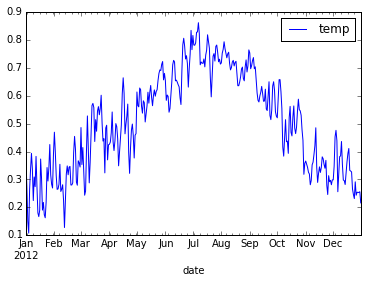

In [17]:
weather.plot(x='date', y='temp')

In [18]:
avg_temp = weather.groupby(weather['date'].dt.month)['temp'].mean()

In [19]:
avg_temp

1     0.275181
2     0.315337
3     0.449411
4     0.468809
5     0.612366
6     0.675111
7     0.752366
8     0.711801
9     0.620083
10    0.500049
11    0.336101
12    0.322880
Name: temp, dtype: float64

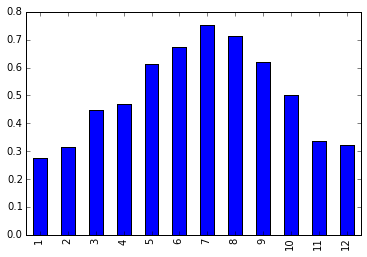

In [20]:
avg_temp.plot(kind='bar')

In [21]:
avg_humidity = weather.groupby(weather['date'].dt.month)['humidity'].mean()

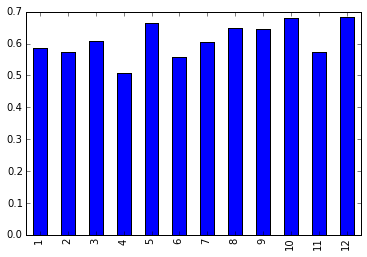

In [22]:
avg_humidity.plot(kind='bar')

## 2. Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

In [50]:
spring_daily_vol = weather.loc[weather['season_desc'] == 'spring']
summer_daily_vol = weather.loc[weather['season_desc'] == 'summer']
fall_daily_vol = weather.loc[weather['season_desc'] == 'fall']
winter_daily_vol = weather.loc[weather['season_desc'] == 'winter']

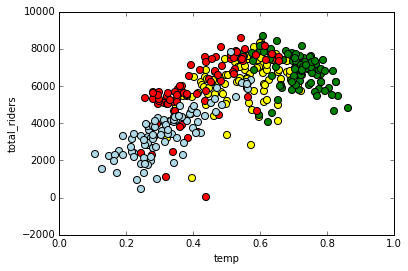

In [55]:
spr_ax = spring_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='yellow', s=50)
sum_ax = summer_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='green', s=50, ax=spr_ax)
fal_ax = fall_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='red', s=50, ax=sum_ax)
win_ax = winter_daily_vol.plot(kind='scatter', x='temp', y='total_riders', c='lightblue', s=50, ax=fal_ax)

## 3. Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

## 4. How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.